<a href="https://colab.research.google.com/github/brkuhgk/yolo/blob/master/yoloObjectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import cv2
import numpy as np

In [93]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [94]:
from google.colab.patches import cv2_imshow

In [95]:
# Load Yolo 
#gdrive/MyDrive/yolov3/
net = cv2.dnn.readNet("gdrive/MyDrive/yolov3/yolov3.weights", "gdrive/MyDrive/yolov3/yolov3.cfg")
classes = []
with open("gdrive/MyDrive/yolov3/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))


In [96]:
# Loading image
img = cv2.imread("gdrive/MyDrive/yolov3/room_ser.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height,width,channels = img.shape


In [97]:
#Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

In [98]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
          


In [114]:
# classes[class_ids[2]]
myset = set()
for ii in class_ids:
  myset.add(ii)
myset

{56, 62, 63, 73}

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


0
1
2
3
4
5


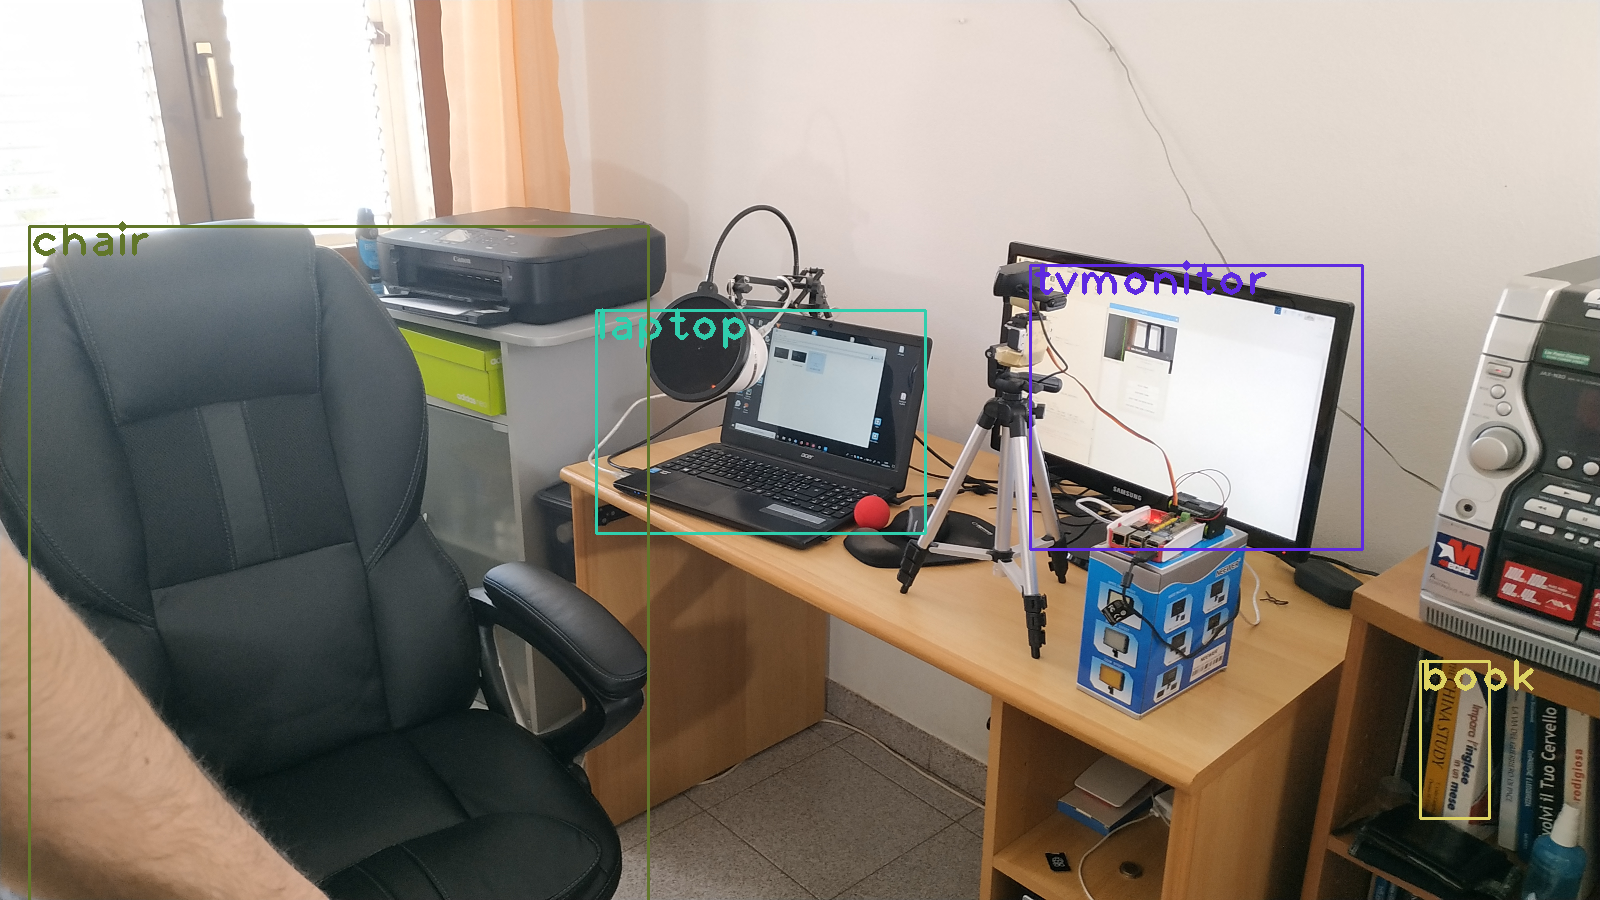

In [102]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    print(i)
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)



cv2_imshow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [101]:
print(x,y,w,h)

1420 661 69 157
